Aurelius Lim

Alyssa Meneses

Sean Umpad

Denzel Yongco

SINTSY S11
















# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import copy

In [2]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Section 1. Introduction


Music is a part of everyday life. We listen to it while doing certain activities such as studying or exercising. We also listen to it for leisure or for fun. Since there are billions of people listening to music, not everyone would have the same interests. Some might listen to music that is energetic while others might listen to music that is relaxing. Though there are others that would listen to a variety of music. Therefore, music would be split into categories called genres based on these audio features. 

Although music is subjective, not all songs are considered equal. There are songs are adored and listened by millions of fans while others barely have any. It could be that a famous artist performed the song or it is catchy and compelling. Since people have different tastes, there are many factors to consider the popularity of a song.

In this study, **we examine the impact of audio features to the overall popularity of a song for each genre by utilizing regression and classification techniques.**

# Section 2. Dataset description

This dataset contains 17,996 songs that was scraped from Spotify. Each row represents a single song, while each column is equivalent to a feature of the song. It contains 17 features with the following descriptions:

`Artist Name` – name of artist

`Track Name` – name of song

`Popularity` - value ranging from 0 to 100, with 100 being the most popular. It is determined by an algorithm and it takes into account the total plays and recentness.

`danceability` – determines a song's dance suitability by taking into account a number of musical elements, such as tempo, beat intensity, rhythm stability, and overall regularity. A score of 0.0 indicates low danceability, while 1.0 signifies high danceability.

`energy` – value ranging from 0.0 to 1.0 and represents a perceptual measure of intensity and
activity. Energetic tracks, characterized by speed, loudness, and noise, tend to score high. Perceptual features contributing to this assessment include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

`key` – indicates the track's key. Standard Pitch Class notation is used to convert numbers to pitches. If there is no key, the value is set to -1.

`loudness` – value in decibels (dB) representing a track's overall loudness. Usually, values fall between -60 and 0 dB.

`mode` – represented as  either 1 for major or 0 for minor, which refers to the scale from which melodic content it originates.

`speechiness` – measures the amount of spoken words in a track, where values below 0.33 more likely indicates non-speech-like tracks, values between 0.33 and 0.66 suggests tracks may include both music and speech, and values between 0.66 and 0.33 indicate recordings primarily composed of spoken content.

`acousticness` – value ranging from 0.0 to 1.0 of whether the track is acoustic. Higher values
indicate higher confidence that it is acoustic.

`instrumentalness` – value ranging from 0.0 to 1.0 which predicts whether or not a track includes vocals, considering the "ooh" and "aah" noises as instrumental. Values above 0.5 suggest increasing confidence in the absence of voice elements, while values closer to 1.0 imply a larger possibility that the track is instrumental.

`liveness` – detects the presence of an audience in a recording wherein larger values suggest a higher chance of a live performance.

`valence` – value ranging from 0.0 to 1.0 represents the degree of the music's positivity, where higher values denote a more upbeat and joyful tone and lower values, a more sad and serious mood.

`tempo` – refers to the overall estimated speed or pace of a track, which is expressed in beats per minute (BPM), that is derived directly from the average beat duration.

`duration_in min/ms` – duration in ms

`time_signature` – value ranging from 3 to 7, indicating the estimated time signature. A notational convention used to identify the number of beats in each bar or measure.

`Class` – genre of the track

# Section 3. List of requirements
*Here are the list of python libraries and modules used for this project*

- pandas
- numpy
- matplotlib
- sklearn
- seaborn
- math
- time
- copy
- torch
- data_loader
- neural_network
- optuna

In [3]:
from data_loader import DataLoader

# Section 4. Data preprocessing and cleaning

Now that we've defined the problem and discussed the features of the dataset, we can move on to the next step of the machine learning process which is cleaning the data. 

To begin, let us display the csv file. 

In [4]:
# csv file is in utf-8, why it can't read Hebrew
with open('music.csv') as f:
    print(f)

<_io.TextIOWrapper name='music.csv' mode='r' encoding='cp1252'>


In [5]:
music_df = pd.read_csv('music.csv', encoding='utf_8_sig')
music_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [6]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Here we can see the 17 features discussed earlier. Lets  take a closer look at the class feature.

In [7]:
music_df['Class'].unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0], dtype=int64)

It seems there are 11 classes which refers to the genre of the music. To reduce unpredictable behavior, it is converted from int into a a str datatype.

In [8]:
music_df['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

In [9]:
music_df['Class'] = music_df['Class'].astype(str)

The given data for the column "Class" shows us the genre of the track. However, this doesn't give us much useful information since it is marked as an integer. Because of this, let us convert it into their actual genres. 

In order to do this, let us get the songs from each genres. We shall limit the amount of songs to 5 in order to not overload the notebook.

In [10]:
# Loop through each class (numerical genre) from 0 to 10
for class_label in range(11):
    class_tracks = music_df[music_df['Class'] == class_label]
    
    # Check if there are any tracks for this class
    if not class_tracks.empty:
        print(f'Class {class_label} Tracks (Limited to 5):')
        for idx, (artist_name, track_name) in enumerate(class_tracks[['Artist Name', 'Track Name']][:5].values):
            print(f'{idx+1}. Artist: {artist_name}, Track: {track_name}')
        print('\n')


Upon a quick google search on the songs from each classes, we made some assumptions based on the search results to assign each class to their designated genres by using the `map` function.

Shown below are the equivalent genres of each class:

Class 0 - Folk

Class 1 - Alternative Rock

Class 2 - Blues Rock

Class 3 - Indian Film Pop

Class 4 - Country

Class 5 - Hip-Hop

Class 6 - Indie Rock

Class 7 - Classical / Jazz

Class 8 - Hard Rock / Heavy Metal / Alternative Metal

Class 9 - Pop

Class 10 - Rock

In [11]:
music_df['Class'] = music_df['Class'].map({'0': 'Folk', '1': 'Alternative Rock', '2': 'Blues Rock', '3': 'Indian Film Pop', '4': 'Country', '5': 'Hip-Hop', '6': 'Indie Rock', '7': 'Classical/Jazz', '8': 'Heavy Metal', '9': 'Pop', '10': 'Rock'})

Here we drop the columns `Artist Name`, and `Track Name` as they are not part of the song features we want to analyze.

In [12]:
music_df = music_df.drop(['Artist Name', 'Track Name'], axis=1)

Afterwards let's split the dataframe into multiple smaller dataframes of each respective genre. Let's try to get all genres by grouping them together.

In [13]:
grouped_df = music_df[['Class']].groupby(['Class'], as_index=False).mean()
grouped_df

,Class
0,Alternative Rock
1,Blues Rock
2,Classical/Jazz
3,Country
4,Folk
5,Heavy Metal
6,Hip-Hop
7,Indian Film Pop
8,Indie Rock
9,Pop


In [14]:
genre = grouped_df['Class'].tolist()
df_collection = {}
for i in range(len(genre)):
    music_df = music_df.sort_values(by=['Class'])
    curr_df = music_df[(music_df['Class'] == genre[i])]
    df_collection[i] = curr_df

Now that the genres have been converted into relevant text, let us check if the dataset contains any null values.

In [15]:
music_df.isnull().any()

Popularity             True
danceability          False
energy                False
key                    True
loudness              False
mode                  False
speechiness           False
acousticness          False
instrumentalness       True
liveness              False
valence               False
tempo                 False
duration_in min/ms    False
time_signature        False
Class                 False
dtype: bool

In [16]:
nan_variables = music_df.columns[music_df.isnull().any()].tolist()

In [17]:
music_df[nan_variables].isnull().sum()

Popularity           428
key                 2014
instrumentalness    4377
dtype: int64

The table shows the breakdown of the null values which are coming from the features `Popularity`, `key`, and `instrumentalness`.

In [18]:
for i in range(len(genre)):
    df_collection[i]['Popularity'] = df_collection[i]['Popularity'].fillna(value=df_collection[i]['Popularity'].mean())
    df_collection[i]['instrumentalness'] = df_collection[i]['instrumentalness'].fillna(value=df_collection[i]['instrumentalness'].mean())
    df_collection[i]['key'] = df_collection[i]['key'].fillna(value=-1)

C:\Users\dbyon\AppData\Local\Temp\ipykernel_28372\2768757888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection[i]['Popularity'] = df_collection[i]['Popularity'].fillna(value=df_collection[i]['Popularity'].mean())
C:\Users\dbyon\AppData\Local\Temp\ipykernel_28372\2768757888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collection[i]['instrumentalness'] = df_collection[i]['instrumentalness'].fillna(value=df_collection[i]['instrumentalness'].mean())
C:\Users\dbyon\AppData\Local\Temp\ip

We can see that each dataframe no longer has null values.

In [19]:
for i in range(len(genre)):
    print(df_collection[i][nan_variables].isnull().sum())

Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64
Popularity          0
key                 0
instrumentalness    0
dtype: int64


# Section 5. Exploratory data analysis

Now that we've cleaned the data, let's run a general analysis of the music_df

In [20]:
big_df = pd.concat(df_collection.values())
print(big_df.describe())

         Popularity  danceability        energy           key      loudness  \
count  17996.000000  17996.000000  17996.000000  17996.000000  17996.000000   
mean      44.499522      0.543433      0.662777      5.174372     -7.910660   
std       17.245727      0.166268      0.235373      3.725649      4.049151   
min        1.000000      0.059600      0.000020     -1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      2.000000     -9.538000   
50%       44.000000      0.545000      0.700000      5.000000     -7.016000   
75%       56.000000      0.659000      0.860000      8.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      17996.000000   
mean       0.636753      0.079707      0.247082          0.158092   
std        0.480949      0.083576      0.310632          0.268555   
min        0

Let us discover how each variable is correlated with one another

C:\Users\dbyon\AppData\Local\Temp\ipykernel_28372\4270296323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = big_df.corr()


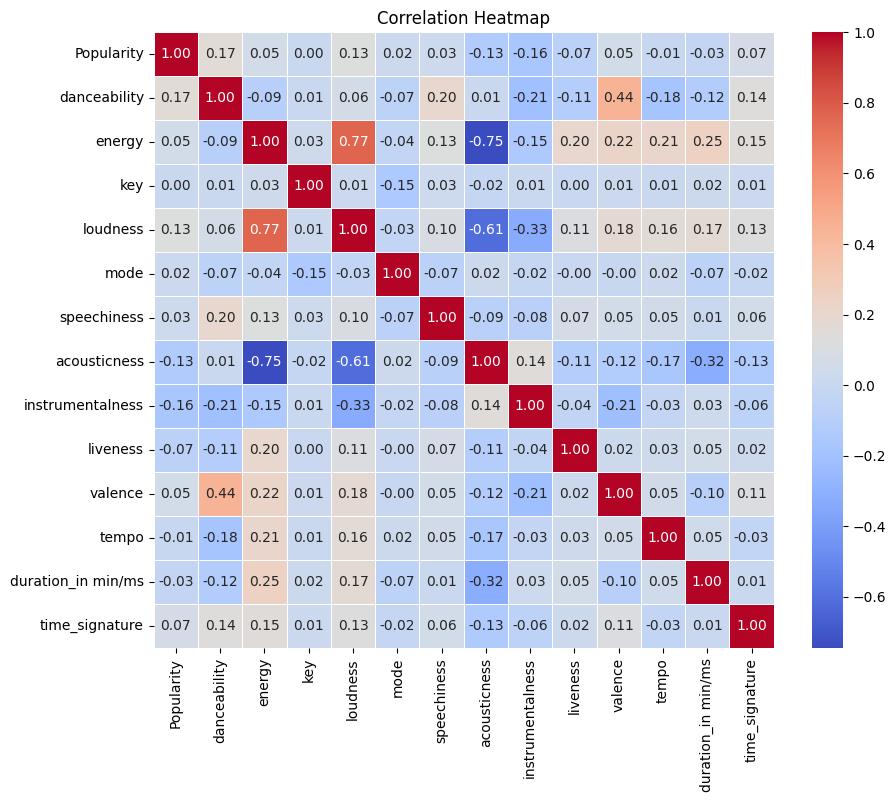

In [21]:
correlation_matrix = big_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

By generating a correlation heatmap, we can see that values that are shown to be warmer denote a positive correlation between the two variables. On the other hand, colder colors denote that the variables are negatively correlated. 

In [22]:
most_popular_df = music_df[(music_df['Popularity'] >= 80)]
most_popular_df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
4425,82.0,0.640,0.663,NaN,-7.516,1,0.0374,0.20100,0.008060,0.1520,0.663,132.770,140773.0,4,Alternative Rock
11855,85.0,0.548,0.532,5.0,-7.596,1,0.0323,0.18600,0.000263,0.2170,0.405,85.030,272394.0,4,Alternative Rock
11949,82.0,0.515,0.430,7.0,-9.935,1,0.0372,0.00970,0.000133,0.1290,0.104,91.844,238640.0,4,Alternative Rock
14687,84.0,0.761,0.525,11.0,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,238805.0,4,Alternative Rock
13770,85.0,0.507,0.828,10.0,-6.023,1,0.0449,0.00711,0.000024,0.2610,0.489,178.032,211295.0,4,Alternative Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,80.0,0.510,0.882,8.0,-5.659,0,0.1590,0.00158,0.002060,0.0764,0.653,154.029,216721.0,4,Rock
4758,80.0,0.671,0.712,2.0,-7.815,1,0.0476,0.42900,NaN,0.1030,0.462,113.805,248440.0,4,Rock
2627,80.0,0.484,0.643,1.0,-4.720,1,0.0416,0.00360,NaN,0.2430,0.345,163.970,195191.0,4,Rock
10398,80.0,0.628,0.744,7.0,-4.718,1,0.0379,0.02570,NaN,0.3130,0.277,119.921,169397.0,4,Rock


We can try to determine the mean popularity of each genre by using `groupby`.

In [23]:
grouped_df = music_df[['Popularity', 'Class']].groupby(['Class'], as_index=False).mean()
grouped_df

,Class,Popularity
0,Alternative Rock,45.883185
1,Blues Rock,32.911695
2,Classical/Jazz,41.506399
3,Country,57.294278
4,Folk,38.105263
5,Heavy Metal,42.226674
6,Hip-Hop,48.638596
7,Indian Film Pop,26.242268
8,Indie Rock,41.474843
9,Pop,50.355953


We can see that `Country` songs have the highest mean popularity, following by `Pop` and `Hip-Hop`. While `Indian Film Pop` songs have the the lowest popularity. Let's try to check the popularity histogram of each class.

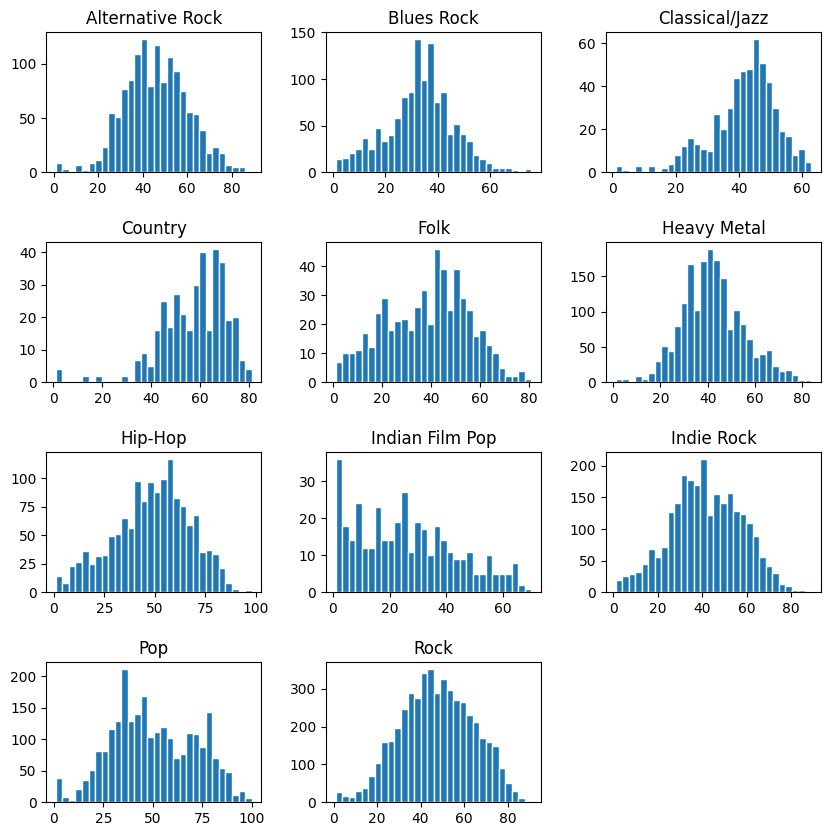

In [24]:
genre = grouped_df['Class'].tolist()
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(len(genre)):
    
    plt.subplot(4, 3, i + 1)
    curr_df = music_df[(music_df['Class'] == genre[i])]
    plt.hist(curr_df['Popularity'], bins=30, edgecolor='white')
    plt.title(genre[i])
plt.show()

Surprisingly, the data is normally distributed for a lot of genres. Though, there are few exceptions such as `Country` and `Indian Pop` as the data is skewed. Let us now shift our focus on investigating how each audio feature contribute to the song's overall popularity by first delving in the `Country` genre. 

In [25]:
country_music_df = big_df[(big_df['Class'] == 'Country')]
country_music_df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
13639,55.0,0.373,0.423,9.0,-11.642,1,0.0618,0.57800,0.001150,0.1600,0.527,187.477,2.542217,3,Country
2543,35.0,0.730,0.225,2.0,-15.429,1,0.0320,0.23000,0.000004,0.2580,0.596,123.610,2.816667,4,Country
361,62.0,0.705,0.606,7.0,-7.047,1,0.0243,0.15900,0.001490,0.2420,0.876,98.001,3.910667,4,Country
402,56.0,0.664,0.601,2.0,-13.379,1,0.0616,0.13700,0.000031,0.0567,0.934,168.979,2.572667,4,Country
8196,46.0,0.659,0.340,4.0,-14.976,1,0.0350,0.84100,0.000598,0.2220,0.694,81.640,3.393333,4,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,57.0,0.721,0.539,10.0,-14.064,1,0.3510,0.68500,0.012675,0.2820,0.963,102.648,4.030217,4,Country
2212,42.0,0.586,0.535,5.0,-11.517,1,0.0274,0.52700,0.016200,0.1430,0.759,99.799,3.545117,4,Country
11797,47.0,0.417,0.484,9.0,-8.781,1,0.0791,0.40900,0.959000,0.0663,0.501,149.790,3.248000,4,Country
8768,59.0,0.697,0.877,6.0,-3.885,1,0.0348,0.00913,0.000007,0.0726,0.768,121.534,5.100450,4,Country


Great! We can now see the list of `Country` songs. Let's try plotting its popularity values into a histogram

C:\Users\dbyon\AppData\Local\Temp\ipykernel_28372\306402875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_music_df.corr()[['Popularity']]


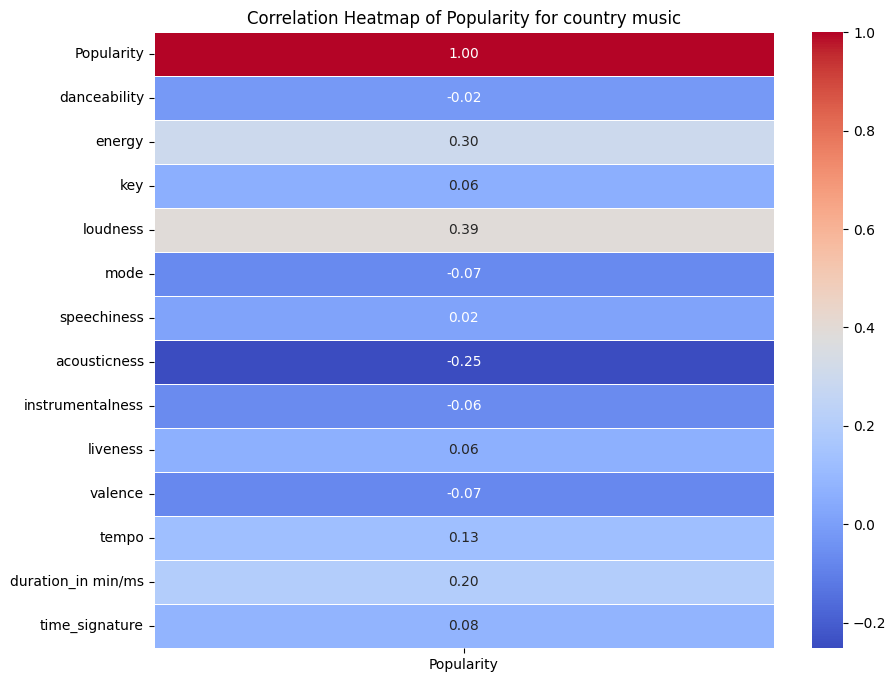

In [26]:
correlation_matrix = country_music_df.corr()[['Popularity']]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap of Popularity for country music')
plt.show()

The same operation is performed to the other genres since audio features affect popularity differently from let's say `Classical/Jazz` to `Blues Rock`. 

C:\Users\dbyon\AppData\Local\Temp\ipykernel_28372\1211106370.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = curr_df.corr()[['Popularity']]
C:\Users\dbyon\AppData\Local\Temp\ipykernel_28372\1211106370.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = curr_df.corr()[['Popularity']]
C:\Users\dbyon\AppData\Local\Temp\ipykernel_28372\1211106370.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = curr_df.corr()[['

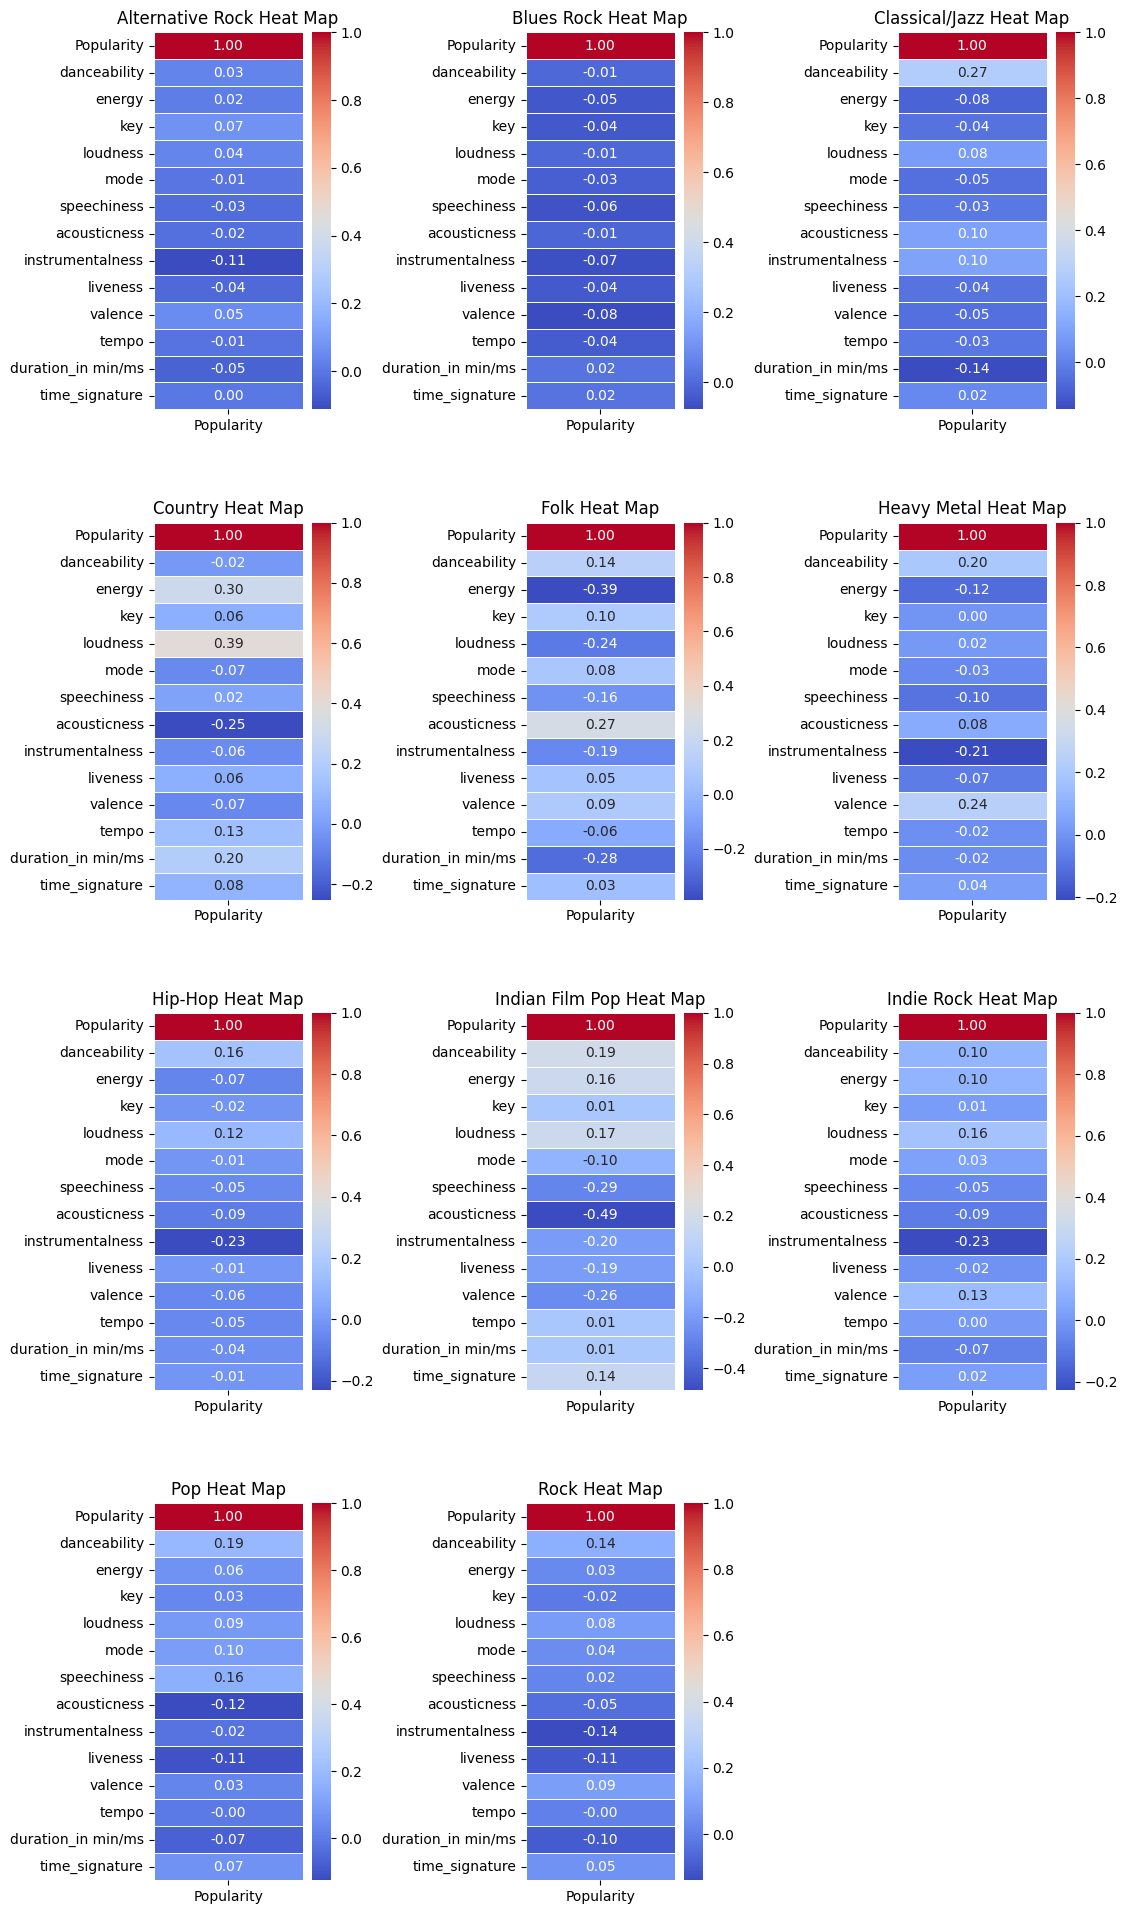

In [27]:
genre = grouped_df['Class'].tolist()
fig = plt.figure(figsize=(12, 24))
fig.subplots_adjust(hspace=0.3, wspace=1.0)
for i in range(len(genre)):
    
    plt.subplot(4, 3, i + 1)
    curr_df = big_df[(big_df['Class'] == genre[i])]
    correlation_matrix = curr_df.corr()[['Popularity']]
    sns.heatmap(correlation_matrix, annot=True,fmt='.2f', linewidths=0.5, cmap='coolwarm')
    plt.title(f'{genre[i]} Heat Map')
plt.show()

As seen in our exploratory data analysis, there is no single audio feature that immediately stands out of being able to substantially influence popularity. It is likely more of a combination of different features that contribute to the overall popularity. Because of this, we shall be utilizing machine learning to create a model to represent the popularity of a song given its features. 

# Section 6. Model training

## 6.1 Linear Regression

In this section, we are going to use linear regression. Linear regression is a simple model that captures linear relationships between variables. However, due to its simplicity we will use Stochastic Gradient instead as it updates the parameters one at a time. This makes it suitable for large datasets. Let's try to import the `SGDRegressor` class. We first split our data into a training set and test set. The training set will comprise of 60% of the data, while the the test set will use 20%. This data will be shuffled to avoid any biases. The root mean squared error will be used to compute for the train and test losses for this model.

In [28]:
i = 0
for g in genre:
    print(i, g)
    i += 1

0 Alternative Rock
1 Blues Rock
2 Classical/Jazz
3 Country
4 Folk
5 Heavy Metal
6 Hip-Hop
7 Indian Film Pop
8 Indie Rock
9 Pop
10 Rock


In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Get the necessary features and labels for each genre

In [30]:
linear_df = copy.deepcopy(df_collection)

The input data is split into the training (60%), test (20%), validation (20%) sets. We setup X and Y for our machine learning model. X does not need popularity and class. Popularity goes to the Y since it is what the model is trying to predict. Lastly, the dataframe is already separated by class depending on its genre, therefore it can be dropped as it reduces the amount of features our model needs to learn. 

In [31]:
X_train_0 = [None] * 11
X_test_0 = [None] * 11
y_train_0 = [None] * 11
y_test_0 = [None] * 11
X_train_val = [None] * 11
y_train_val = [None] * 11
X_val = [None] * 11
y_val = [None] * 11

for i in range(0, len(genre)): 
    X_0 = linear_df[i].drop(['Popularity', 'Class'], axis=1)
    y_0 = linear_df[i]['Popularity']
    # Splitting data into train-validation and test sets (80% train-validation, 20% test)
    X_train_val[i], X_test_0[i], y_train_val[i], y_test_0[i] = train_test_split(X_0, y_0, test_size=0.2, random_state=1)

    # Splitting train-validation into train and validation sets (60% train, 20% validation)
    X_train_0[i], X_val[i], y_train_0[i], y_val[i] = train_test_split(X_train_val[i], y_train_val[i], test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

    
    X_train_0[i] = X_train_0[i].values
    X_test_0[i] = X_test_0[i].values
    y_train_0[i] = y_train_0[i].values
    y_test_0[i] = y_test_0[i].values
    print("GENRE: ", i)
    print("X train:",X_train_0[i].shape)
    print("Y train:", y_train_0[i].shape)
    print("X_test:",X_test_0[i].shape)
    print("y_test:",y_test_0[i].shape)
    print("X_val:",X_val[i].shape)
    print("Y_val:",y_val[i].shape)
    

GENRE:  0
X train: (823, 13)
Y train: (823,)
X_test: (275, 13)
y_test: (275,)
X_val: (275, 13)
Y_val: (275,)
GENRE:  1
X train: (762, 13)
Y train: (762,)
X_test: (255, 13)
y_test: (255,)
X_val: (255, 13)
Y_val: (255,)
GENRE:  2
X train: (345, 13)
Y train: (345,)
X_test: (116, 13)
y_test: (116,)
X_val: (115, 13)
Y_val: (115,)
GENRE:  3
X train: (231, 13)
Y train: (231,)
X_test: (78, 13)
y_test: (78,)
X_val: (78, 13)
Y_val: (78,)
GENRE:  4
X train: (375, 13)
Y train: (375,)
X_test: (125, 13)
y_test: (125,)
X_val: (125, 13)
Y_val: (125,)
GENRE:  5
X train: (1112, 13)
Y train: (1112,)
X_test: (371, 13)
y_test: (371,)
X_val: (371, 13)
Y_val: (371,)
GENRE:  6
X train: (867, 13)
Y train: (867,)
X_test: (290, 13)
y_test: (290,)
X_val: (290, 13)
Y_val: (290,)
GENRE:  7
X train: (240, 13)
Y train: (240,)
X_test: (81, 13)
y_test: (81,)
X_val: (81, 13)
Y_val: (81,)
GENRE:  8
X train: (1551, 13)
Y train: (1551,)
X_test: (518, 13)
y_test: (518,)
X_val: (518, 13)
Y_val: (518,)
GENRE:  9
X train: (151

In [32]:
for i in range(0, len(genre)):
    model = SGDRegressor(eta0=1e-9, max_iter=10000, penalty=None, learning_rate='constant', random_state=1)
    
    # train the data
    model.fit(X_train_0[i], y_train_0[i])
    
    # predict the data regards to the train data
    y_predicted_0 = model.predict(X_train_0[i])
    
    train_mse = mean_squared_error(y_train_0[i], y_predicted_0)
    train_rmse = math.sqrt(train_mse)
    
    print(f'\nGenre {i} Train RMSE: {train_rmse}\n')
    
     # predict the data regards to the test data
    y_predicted_0 = model.predict(X_test_0[i])
    
    test_mse = mean_squared_error(y_test_0[i], y_predicted_0)
    test_rmse = math.sqrt(test_mse)
    
    print(f'\nGenre {i} Test RMSE: {test_rmse}\n')


Genre 0 Train RMSE: 47497872789147.03


Genre 0 Test RMSE: 47933797024772.69


Genre 1 Train RMSE: 18157324621295.113


Genre 1 Test RMSE: 18327933325108.73


Genre 2 Train RMSE: 14.503673579727355


Genre 2 Test RMSE: 15.053779778375654


Genre 3 Train RMSE: 18.21107012859181


Genre 3 Test RMSE: 16.979143882823113


Genre 4 Train RMSE: 18.523521414480623


Genre 4 Test RMSE: 19.49721633864716


Genre 5 Train RMSE: 45477733428013.59


Genre 5 Test RMSE: 45251820917026.48


Genre 6 Train RMSE: 6109551230040.593


Genre 6 Test RMSE: 6286992453422.952


Genre 7 Train RMSE: 18.098426172632067


Genre 7 Test RMSE: 18.59023626418241


Genre 8 Train RMSE: 14945421180064.307


Genre 8 Test RMSE: 15253166324711.176


Genre 9 Train RMSE: 73675467183148.81


Genre 9 Test RMSE: 74581026133375.42


Genre 10 Train RMSE: 78467410654332.77


Genre 10 Test RMSE: 80758374551287.61



As you can see, the train and test RMSE for most genres are very high. Only 4 genres got a substantially low RMSE. These are Genres 2, 3, 4, and 7. Though comparing the train and test RMSE values, it confirms that the models are not overfit as these values relatively close to each other.

## 6.2 Logistic Regression

In this section, multinomial logistic regression is utilized. Changes have to be made on the original dataset for this model to work. We will add a new column `Popular` and define 3 classes which are namely: `not known`, `mainstream`, `popular`.  Through this, we will still gain insights on how each feature contribute to the song's popularity by characterizing it.

We have to consider class 0, class 1, class 2 of logistic regression. In this case, `popular` songs are characterized with popularity of atleast 80 while songs that are `mainstream` but not widely popular will be those that range from 30 to 79 and songs that are generally `not known` are with popularity below 30. The classes are assigned as {0: `not known`} {1: `mainstream`} {2: `popular`}

A deepcopy of df_collection is performed on the logistic_df because we shall be adding the column `Popular` to the Dataframe. 

In [33]:
popularity_threshold = 80
mainstream_threshold = 30
logistic_df = copy.deepcopy(df_collection)
for i in range(0, len(genre)):
    logistic_df[i]['Popular'] = logistic_df[i]['Popularity'].apply(lambda x: 2 if x >= popularity_threshold else (1 if x >= mainstream_threshold else 0))
logistic_df[0].head(500)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popular
12446,60.0,0.581,0.934,8.0,-5.511,1,0.0547,0.000169,0.002970,0.0901,0.391,120.024,184027.0,4,Alternative Rock,1
11236,45.0,0.500,0.947,4.0,-3.602,1,0.0452,0.044000,0.199239,0.2050,0.966,181.834,105516.0,4,Alternative Rock,1
4294,60.0,0.513,0.889,3.0,-4.924,1,0.0599,0.457000,0.000366,0.2170,0.791,171.917,209413.0,4,Alternative Rock,1
4303,64.0,0.619,0.781,5.0,-7.455,0,0.0393,0.024300,0.000286,0.4020,0.533,126.267,236583.0,4,Alternative Rock,1
11201,55.0,0.697,0.919,7.0,-6.174,1,0.0290,0.006940,0.062100,0.2030,0.943,118.341,256400.0,4,Alternative Rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13394,63.0,0.551,0.780,-1.0,-6.659,1,0.0550,0.094100,0.000001,0.1100,0.421,135.023,250613.0,4,Alternative Rock,1
2880,36.0,0.643,0.502,7.0,-12.373,1,0.0366,0.679000,0.002510,0.1430,0.418,107.783,271441.0,4,Alternative Rock,1
1897,63.0,0.523,0.803,4.0,-5.189,0,0.0450,0.579000,0.199239,0.0948,0.898,132.316,145293.0,4,Alternative Rock,1
2898,30.0,0.538,0.899,9.0,-5.426,1,0.1050,0.000942,0.005090,0.0385,0.267,159.941,154251.0,4,Alternative Rock,1


Now that the dataframe has been modified to allow classification through logistic regressoin. Let us split the training set, test set and validation set in a 60-20-20 split. 

In [34]:
X_train_0 = [None] * 11
X_test_0 = [None] * 11
y_train_0 = [None] * 11
y_test_0 = [None] * 11
X_train_val = [None] * 11
y_train_val = [None] * 11
X_val = [None] * 11
y_val = [None] * 11

for i in range(0, len(genre)): 
    X_0 = logistic_df[i].drop(['Popularity', 'Class', 'Popular'], axis=1)
    y_0 = logistic_df[i]['Popular']
    # Splitting data into train-validation and test sets (80% train-validation, 20% test)
    X_train_val[i], X_test_0[i], y_train_val[i], y_test_0[i] = train_test_split(X_0, y_0, test_size=0.2, random_state=1)

    # Splitting train-validation into train and validation sets (60% train, 20% validation)
    X_train_0[i], X_val[i], y_train_0[i], y_val[i] = train_test_split(X_train_val[i], y_train_val[i], test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

    
    X_train_0[i] = X_train_0[i].values
    X_test_0[i] = X_test_0[i].values
    y_train_0[i] = y_train_0[i].values
    y_test_0[i] = y_test_0[i].values
    print("GENRE: ", i)
    print("X train:",X_train_0[i].shape)
    print("Y train:", y_train_0[i].shape)
    print("X_test:",X_test_0[i].shape)
    print("y_test:",y_test_0[i].shape)
    print("X_val:",X_val[i].shape)
    print("Y_val:",y_val[i].shape)


GENRE:  0
X train: (823, 13)
Y train: (823,)
X_test: (275, 13)
y_test: (275,)
X_val: (275, 13)
Y_val: (275,)
GENRE:  1
X train: (762, 13)
Y train: (762,)
X_test: (255, 13)
y_test: (255,)
X_val: (255, 13)
Y_val: (255,)
GENRE:  2
X train: (345, 13)
Y train: (345,)
X_test: (116, 13)
y_test: (116,)
X_val: (115, 13)
Y_val: (115,)
GENRE:  3
X train: (231, 13)
Y train: (231,)
X_test: (78, 13)
y_test: (78,)
X_val: (78, 13)
Y_val: (78,)
GENRE:  4
X train: (375, 13)
Y train: (375,)
X_test: (125, 13)
y_test: (125,)
X_val: (125, 13)
Y_val: (125,)
GENRE:  5
X train: (1112, 13)
Y train: (1112,)
X_test: (371, 13)
y_test: (371,)
X_val: (371, 13)
Y_val: (371,)
GENRE:  6
X train: (867, 13)
Y train: (867,)
X_test: (290, 13)
y_test: (290,)
X_val: (290, 13)
Y_val: (290,)
GENRE:  7
X train: (240, 13)
Y train: (240,)
X_test: (81, 13)
y_test: (81,)
X_val: (81, 13)
Y_val: (81,)
GENRE:  8
X train: (1551, 13)
Y train: (1551,)
X_test: (518, 13)
y_test: (518,)
X_val: (518, 13)
Y_val: (518,)
GENRE:  9
X train: (151

The code above shows the count of records for the train set, test set and validation set for each genre. Logistic Regression will use the 13 properties to classify the popularity of a song. For this, we are using stochastic gradient descent specified by `SGDClassifier` from scikit learn. The learning rate is set to `constant` with an initial value of `1e-9`

In [35]:

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
model = [None] * len(genre)
for i in range(0, len(genre)):
    data_loader = DataLoader(X_train_0[i], y_train_0[i], 5) 
    max_epochs = 10
    model[i] = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=1e-9, random_state=1, verbose=0)
    e = 0
    is_converged = False
    previous_loss = 0
   
    print("Genre:", i)
    # For each epoch
    while e < max_epochs and is_converged is not True:

        loss = 0

        # TODO: Get the batch for this epoch.
        X_batch, y_batch = data_loader.get_batch()

        # For each batch
        for X, y in zip(X_batch, y_batch):

            # TODO: Partial fit the model to the subset you selected
            # In partial fit, you have to pass a classes parameters, use labels as the value
           
            model[i].partial_fit(X, y, classes=np.unique(y_train_0[i]))

            # Compute the loss
            y_pred = model[i].predict_proba(X_train_0[i])
            loss += log_loss(y_train_0[i], y_pred)

        # Display the average loss per epoch
        print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))

        if abs(previous_loss - loss) < 0.05:
            is_converged = True
        else:
            previous_loss = loss
            e += 1

Genre: 0
Epoch: 1 	Loss: 4.100333402264434
Epoch: 2 	Loss: 3.666066322035475
Epoch: 3 	Loss: 3.5299704707972834
Epoch: 4 	Loss: 3.432089190032923
Epoch: 5 	Loss: 3.0707486274450897
Epoch: 6 	Loss: 3.712937210225415
Epoch: 7 	Loss: 4.010693536619345
Epoch: 8 	Loss: 3.8911111922796118
Epoch: 9 	Loss: 4.05322597533227
Epoch: 10 	Loss: 4.065521544354982
Genre: 1
Epoch: 1 	Loss: 11.084368840205979
Epoch: 2 	Loss: 11.900059142263835
Epoch: 3 	Loss: 11.273869029248212
Epoch: 4 	Loss: 11.743396835047502
Epoch: 5 	Loss: 11.008330477298992
Epoch: 6 	Loss: 11.290664508567659
Epoch: 7 	Loss: 11.227906642388362
Epoch: 8 	Loss: 11.46851911717481
Epoch: 9 	Loss: 10.708977450900116
Epoch: 10 	Loss: 10.60901017478925
Genre: 2
Epoch: 1 	Loss: 0.6928479273813064
Epoch: 2 	Loss: 0.6922696656548152
Genre: 3
Epoch: 1 	Loss: 0.6927507752637823
Epoch: 2 	Loss: 0.691987256344794
Genre: 4
Epoch: 1 	Loss: 1.0982389343489258
Epoch: 2 	Loss: 1.0975150759198227
Epoch: 3 	Loss: 1.0967798004392455
Epoch: 4 	Loss: 1.0

After training the data, let us put it to the test with the `test set` and loop through each genre. 

In [36]:
num_correct = [None] * len(genre)
for i in range(0, len(genre)):
    print("Genre:", i)
    predictions = model[i].predict(X_test_0[i])
    correct_predictions = (predictions == y_test_0[i])
    num_correct[i] = sum(correct_predictions)
    print(num_correct[i], "out of ", len(y_test_0[i]))

Genre: 0
240 out of  275
Genre: 1
73 out of  255
Genre: 2
97 out of  116
Genre: 3
78 out of  78
Genre: 4
84 out of  125
Genre: 5
316 out of  371
Genre: 6
228 out of  290
Genre: 7
51 out of  81
Genre: 8
411 out of  518
Genre: 9
374 out of  505
Genre: 10
805 out of  990


In [37]:
for i in range(0, len(genre)):
    accuracy = num_correct[i] / len(y_test_0[i])
    print("Genre:", i, " ", accuracy)

Genre: 0   0.8727272727272727
Genre: 1   0.28627450980392155
Genre: 2   0.8362068965517241
Genre: 3   1.0
Genre: 4   0.672
Genre: 5   0.8517520215633423
Genre: 6   0.7862068965517242
Genre: 7   0.6296296296296297
Genre: 8   0.7934362934362934
Genre: 9   0.7405940594059406
Genre: 10   0.8131313131313131


The model performed well with an accuracy of over 70% in 9/11 genres. On the other hand, it performed poorly on genre 1, 4, and 7. 

Let us double check if the model is overfit by testing it on the train set.

In [38]:
num_correct = [None] * len(genre)
for i in range(0, len(genre)):
    print("Genre:", i)
    predictions = model[i].predict(X_train_0[i])
    correct_predictions = (predictions == y_train_0[i])
    num_correct[i] = sum(correct_predictions)
    print(num_correct[i], "out of ", len(y_train_0[i]))

Genre: 0
735 out of  823
Genre: 1
276 out of  762
Genre: 2
303 out of  345
Genre: 3
225 out of  231
Genre: 4
277 out of  375
Genre: 5
940 out of  1112
Genre: 6
692 out of  867
Genre: 7
140 out of  240
Genre: 8
1214 out of  1551
Genre: 9
1135 out of  1514
Genre: 10
2508 out of  2969


In [39]:
for i in range(0, len(genre)):
    accuracy = num_correct[i] / len(y_train_0[i])
    print("Genre:", i, " ", accuracy)

Genre: 0   0.8930741190765492
Genre: 1   0.36220472440944884
Genre: 2   0.8782608695652174
Genre: 3   0.974025974025974
Genre: 4   0.7386666666666667
Genre: 5   0.8453237410071942
Genre: 6   0.798154555940023
Genre: 7   0.5833333333333334
Genre: 8   0.7827208252740168
Genre: 9   0.749669749009247
Genre: 10   0.8447288649376895


In the training set, it performed better with 9/11 genres having an accuracy of over 70%. Only genres 1 and 7 were below the standards. The accuracy was also on average higher across the genres. However, it seems that it still has trouble capturing the pattern because of all the properties. This confirms that the model is not overfit. 

## 6.3 Neural Network

There are many features in the dataset that could determine a song's overall popularity. It could be difficult for linear models to adequately reflect the complex and non-linear correlations between these features and popularity. Neural Networks can capture complex relationships and non-linear patterns. It can adaptively learn the complex relationship by assigning weights to the features, which could helps us identify what affect songs popularity across genres. 

Make a deepcopy of `df_collection` to `neural_df` and split the train set, test set and validation set in a 60-20-20 split similar to before.

In [40]:
X_train_0 = [None] * 11
X_test_0 = [None] * 11
y_train_0 = [None] * 11
y_test_0 = [None] * 11
X_train_val = [None] * 11
y_train_val = [None] * 11
X_val = [None] * 11
y_val = [None] * 11
neural_df = copy.deepcopy(df_collection)
for i in range(0, len(genre)): 
    X_0 = neural_df[i].drop(['Popularity', 'Class'], axis=1)
    y_0 = neural_df[i]['Popularity']
    # Splitting data into train-validation and test sets (80% train-validation, 20% test)
    X_train_val[i], X_test_0[i], y_train_val[i], y_test_0[i] = train_test_split(X_0, y_0, test_size=0.2, random_state=1)

    # Splitting train-validation into train and validation sets (60% train, 20% validation)
    X_train_0[i], X_val[i], y_train_0[i], y_val[i] = train_test_split(X_train_val[i], y_train_val[i], test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

    
    X_train_0[i] = X_train_0[i].values
    X_test_0[i] = X_test_0[i].values
    y_train_0[i] = y_train_0[i].values
    y_test_0[i] = y_test_0[i].values
    print("GENRE: ", i)
    print("X train:",X_train_0[i].shape)
    print("Y train:", y_train_0[i].shape)
    print("X_test:",X_test_0[i].shape)
    print("y_test:",y_test_0[i].shape)
    print("X_val:",X_val[i].shape)
    print("Y_val:",y_val[i].shape)
    

GENRE:  0
X train: (823, 13)
Y train: (823,)
X_test: (275, 13)
y_test: (275,)
X_val: (275, 13)
Y_val: (275,)
GENRE:  1
X train: (762, 13)
Y train: (762,)
X_test: (255, 13)
y_test: (255,)
X_val: (255, 13)
Y_val: (255,)
GENRE:  2
X train: (345, 13)
Y train: (345,)
X_test: (116, 13)
y_test: (116,)
X_val: (115, 13)
Y_val: (115,)
GENRE:  3
X train: (231, 13)
Y train: (231,)
X_test: (78, 13)
y_test: (78,)
X_val: (78, 13)
Y_val: (78,)
GENRE:  4
X train: (375, 13)
Y train: (375,)
X_test: (125, 13)
y_test: (125,)
X_val: (125, 13)
Y_val: (125,)
GENRE:  5
X train: (1112, 13)
Y train: (1112,)
X_test: (371, 13)
y_test: (371,)
X_val: (371, 13)
Y_val: (371,)
GENRE:  6
X train: (867, 13)
Y train: (867,)
X_test: (290, 13)
y_test: (290,)
X_val: (290, 13)
Y_val: (290,)
GENRE:  7
X train: (240, 13)
Y train: (240,)
X_test: (81, 13)
y_test: (81,)
X_val: (81, 13)
Y_val: (81,)
GENRE:  8
X train: (1551, 13)
Y train: (1551,)
X_test: (518, 13)
y_test: (518,)
X_val: (518, 13)
Y_val: (518,)
GENRE:  9
X train: (151

In [41]:
from neural_network import NeuralNetwork
import torch.nn as nn
import torch.optim as optim
import torch

Here we create a neural network for each of the genres.

In [42]:
networks = {}
optimizers = {}
for i in range(0, len(genre)):
    network = NeuralNetwork(input_size = 13, num_classes = 1, list_hidden = (5, 10), activation = 'relu')
    network.create_network()
    network.init_weights()
    optimizer = optim.Adam(network.parameters(), lr = 0.001)
    optimizers[i] = optimizer
    networks[i] = network
    print(f"Model for Genre {i}:")
    print(network)

Using activation function: relu
Model for Genre 0:
NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Softmax(dim=1)
  )
)
Using activation function: relu
Model for Genre 1:
NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Softmax(dim=1)
  )
)
Using activation function: relu
Model for Genre 2:
NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=10

Now we can simply train a neural network model for each genre using MSE loss and at the end we can calculate for the RMSE for each genre. We set it the epochs to 150 but if the loss stabilizes we can converge it earlier.

In [43]:
criterion = nn.MSELoss()
max_epochs = 150

for i in range(len(genre)):
    e=0
    is_converged=False
    previous_loss = 0
    
    print('--- Genre',i, ':', genre[i],'---')
    while e < max_epochs and not is_converged:
        current_epoch_loss = 0
        X = torch.Tensor(X_train_0[i])
        y = torch.Tensor(y_train_0[i]) 
        optimizers[i].zero_grad()
        scores, _ = networks[i].forward(X, verbose=False) 
        scores = scores.squeeze() if scores.dim() > 1 else scores
        loss = criterion(scores.squeeze(), y) 
        loss.backward()
        optimizers[i].step()
        current_epoch_loss += loss.item()
        
        if(e==0 or e==49 or e==max_epochs):
            print('Epoch:', e + 1, '\tLoss:', current_epoch_loss)
        
        if abs(previous_loss - current_epoch_loss) < 0.05:
            is_converged = True
            print('Epoch:', e + 1, '\tLoss:', current_epoch_loss)
        else:
            previous_loss = current_epoch_loss
            e += 1
        
networks[i].eval()
print('\nTraining Loss:\n')
for i in range(len(genre)):
    X_train = torch.Tensor(X_train_0[i])
    scores, probabilities = network.forward(X_train, verbose=False)
    predictions = network.predict(probabilities)
    mse = mean_squared_error(y_train_0[i], predictions)
    rmse = np.sqrt(mse)
    #print('MSE for Genre', i, ':', mse)
    print('RMSE for Genre', i, ':', rmse)

networks[i].train()

--- Genre 0 : Alternative Rock ---
Epoch: 1 	Loss: 1657226.0
Epoch: 50 	Loss: 2949.154052734375
Epoch: 121 	Loss: 345.7708435058594
--- Genre 1 : Blues Rock ---
Epoch: 1 	Loss: 2247445.75
Epoch: 50 	Loss: 5184.48046875
Epoch: 123 	Loss: 311.7912292480469
--- Genre 2 : Classical/Jazz ---
Epoch: 1 	Loss: 1840.134765625
Epoch: 50 	Loss: 1714.1893310546875
--- Genre 3 : Country ---
Epoch: 1 	Loss: 3395.886474609375
Epoch: 50 	Loss: 3230.350830078125
--- Genre 4 : Folk ---
Epoch: 1 	Loss: 1683.9638671875
Epoch: 50 	Loss: 1561.155029296875
--- Genre 5 : Heavy Metal ---
Epoch: 1 	Loss: 2561612.75
Epoch: 50 	Loss: 5380.224609375
Epoch: 147 	Loss: 355.1903381347656
--- Genre 6 : Hip-Hop ---
Epoch: 1 	Loss: 1422599.375
Epoch: 50 	Loss: 2581.820556640625
Epoch: 121 	Loss: 562.9437866210938
--- Genre 7 : Indian Film Pop ---
Epoch: 1 	Loss: 1050.70654296875
Epoch: 50 	Loss: 965.044921875
--- Genre 8 : Indie Rock ---
Epoch: 1 	Loss: 1855016.625
Epoch: 50 	Loss: 3778.501708984375
Epoch: 122 	Loss: 44

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Softmax(dim=1)
  )
)

Now let's try getting the losses of the test set.

In [44]:
networks[i].eval()
print('Test losses:')
for i in range(len(genre)):
    X_test = torch.Tensor(X_test_0[i])
    scores, probabilities = network.forward(X_test, verbose=False)
    predictions = network.predict(probabilities)
    mse = mean_squared_error(y_test_0[i], predictions)
    rmse = np.sqrt(mse)
    #print('MSE for Genre', i, ':', mse)
    print('RMSE for Genre', i, ':', rmse)

networks[i].train()

Test losses:
RMSE for Genre 0 : 46.80870676492754
RMSE for Genre 1 : 36.39246303018387
RMSE for Genre 2 : 41.87517038944883
RMSE for Genre 3 : 60.26354209094954
RMSE for Genre 4 : 40.684557770697594
RMSE for Genre 5 : 43.91134918813035
RMSE for Genre 6 : 52.11858379738898
RMSE for Genre 7 : 29.89267081894954
RMSE for Genre 8 : 44.31030128384843
RMSE for Genre 9 : 55.04699457388825
RMSE for Genre 10 : 49.32258047023663


NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Softmax(dim=1)
  )
)

As we can see here, the losses for both train and test set are similar but the loss values are still higher than we'd like.

# Section 7. Hyperparameter tuning

## 7.1 Linear Regression

So far, we can see that we have an extremely high train and test errors for multiple genres. Let's try to reduce these errors by tuning our hyperparameters. Let's first import the `GridSearchCV` class. Then let's display the errors of the model from the training, testing, and validation set, as well as the respective hyperparameters, `alpha`, `penalty`, `max_iter`, and `eta0`.

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
linear_model = SGDRegressor(random_state=1)

In [47]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant'],
    'max_iter': [1000, 2000, 5000, 10000],
    'eta0': [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
}

In [48]:
best_models = [None] * len(genre)
for i in range(0, len(genre)):
    grid_result = GridSearchCV(linear_model, param_grid, error_score='raise', cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
    
    # fit the model
    grid_result.fit(X_train_0[i], y_train_0[i])
    
    best_params = grid_result.best_params_
    
    # get the best model
    best_model = grid_result.best_estimator_
    best_models[i] = best_model
    
    # make a prediction on the training data
    y_predicted_train = best_model.predict(X_train_0[i])
    
    # make a prediction on the test data
    y_predicted_0 = best_model.predict(X_test_0[i])
    
    # make a prediction on the validation data
    y_predicted_val = best_model.predict(X_val[i])
    
    train_mse = mean_squared_error(y_train_0[i], y_predicted_train)
    train_rmse =math.sqrt(train_rmse)
    
    test_mse = mean_squared_error(y_test_0[i], y_predicted_0)
    test_rmse = math.sqrt(test_mse)
    
    val_mse = mean_squared_error(y_val[i], y_predicted_val)
    val_rmse = math.sqrt(val_mse)
    
    
    print(f'\nGenre {i} Train RMSE: {train_rmse} Test RMSE: {test_rmse} Val RMSE: {val_rmse} Best params: {best_params}\n')

C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 0 Train RMSE: 8858183.259242991 Test RMSE: 18.5353312667328 Val RMSE: 21.369513324068475 Best params: {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 1 Train RMSE: 2976.2700245849655 Test RMSE: 16.145339554557545 Val RMSE: 16.8259210666403 Best params: {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 2 Train RMSE: 54.55520162720477 Test RMSE: 15.053779781307645 Val RMSE: 14.49018286808786 Best params: {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 2000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 3 Train RMSE: 7.386149309836944 Test RMSE: 16.979143928450757 Val RMSE: 18.23466349567359 Best params: {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 2000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 4 Train RMSE: 2.717747101891003 Test RMSE: 19.497216306986342 Val RMSE: 18.88524466080417 Best params: {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 5 Train RMSE: 1.6485590986952827 Test RMSE: 18.365018832851867 Val RMSE: 18.265246479049154 Best params: {'alpha': 0.1, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 6 Train RMSE: 1.2839622652925913 Test RMSE: 25.569194257621625 Val RMSE: 23.771275275514075 Best params: {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 7 Train RMSE: 1.1331205872688888 Test RMSE: 18.590236239452082 Val RMSE: 18.090627379320466 Best params: {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 2000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 8 Train RMSE: 1.0644813700900964 Test RMSE: 23.31646229766849 Val RMSE: 21.49421191411257 Best params: {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(



Genre 9 Train RMSE: 1.03173706441617 Test RMSE: 31.17808738171844 Val RMSE: 30.96081886732873 Best params: {'alpha': 0.1, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}


Genre 10 Train RMSE: 1.0157445862106134 Test RMSE: 27.551544533436996 Val RMSE: 25.85623999351553 Best params: {'alpha': 0.1, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}



C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


With the newly tuned model, let us get the weights of each features to determine its effect on the song's popularity.

In [49]:
for i in range(len(genre)):
    feature_weights = best_models[i].coef_
    print(f"\nGenre {i} Feature Weights:")
    for feature, weight in zip(X_0.columns, feature_weights):
        print(f"{feature}: {weight}")


Genre 0 Feature Weights:
danceability: 2.6369185957029576e-09
energy: 3.2977521915292805e-09
key: 3.240224934080521e-08
loudness: -2.4941145273780237e-08
mode: 3.0716030065166866e-09
speechiness: 3.1656045426849394e-10
acousticness: 5.593925687715224e-10
instrumentalness: -2.420278714348861e-10
liveness: 8.08873535443709e-10
valence: 2.9982384940175466e-09
tempo: 5.835890824119187e-07
duration_in min/ms: 0.0001882719974773013
time_signature: 1.7945011649365044e-08

Genre 1 Feature Weights:
danceability: 2.9681172785889363e-09
energy: 2.510339499488354e-09
key: 2.3045137356874412e-08
loudness: -4.1764978407866365e-08
mode: 3.049420406736765e-09
speechiness: 2.919366927812045e-10
acousticness: 2.555996155041747e-09
instrumentalness: 1.5996774498212458e-10
liveness: 5.39456039318172e-10
valence: 3.181109775903231e-09
tempo: 5.254899465970809e-07
duration_in min/ms: 0.00011454569374924182
time_signature: 1.9609155218350357e-08

Genre 2 Feature Weights:
danceability: 0.0019917245792081444


<insert text>

## 7.2 Logistic Regression

We received mixed results in terms of the accuracy across different genres. This means the proporties affecting the popularity of a specific genre does not necessarily apply to another. Depending on the genre, some may have little to do with the given properties at all causing the low accuracy of our model. This is shown in the case of genre 1 and 9 having an accuracy of below 50%. With this, let us try to fine tune the parameters to see if we can achieve a higher accuracy for our model. 

In [50]:
X_train_0 = [None] * len(genre)
X_test_0 = [None] * len(genre)
y_train_0 = [None] * len(genre)
y_test_0 = [None] * len(genre)
X_train_val = [None] * len(genre)
y_train_val = [None] * len(genre)
X_val = [None] * len(genre)
y_val = [None] * len(genre)

for i in range(0, len(genre)): 
    X_0 = logistic_df[i].drop(['Popularity', 'Class', 'Popular'], axis=1)
    y_0 = logistic_df[i]['Popular']
    # Splitting data into train-validation and test sets (80% train-validation, 20% test)
    X_train_val[i], X_test_0[i], y_train_val[i], y_test_0[i] = train_test_split(X_0, y_0, test_size=0.2, random_state=1)

    # Splitting train-validation into train and validation sets (60% train, 20% validation)
    X_train_0[i], X_val[i], y_train_0[i], y_val[i] = train_test_split(X_train_val[i], y_train_val[i], test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

    
    X_train_0[i] = X_train_0[i].values
    X_test_0[i] = X_test_0[i].values
    y_train_0[i] = y_train_0[i].values
    y_test_0[i] = y_test_0[i].values
    print("GENRE: ", i)
    print("X train:",X_train_0[i].shape)
    print("Y train:", y_train_0[i].shape)
    print("X_test:",X_test_0[i].shape)
    print("y_test:",y_test_0[i].shape)
    print("X_val:",X_val[i].shape)
    print("Y_val:",y_val[i].shape)
    

GENRE:  0
X train: (823, 13)
Y train: (823,)
X_test: (275, 13)
y_test: (275,)
X_val: (275, 13)
Y_val: (275,)
GENRE:  1
X train: (762, 13)
Y train: (762,)
X_test: (255, 13)
y_test: (255,)
X_val: (255, 13)
Y_val: (255,)
GENRE:  2
X train: (345, 13)
Y train: (345,)
X_test: (116, 13)
y_test: (116,)
X_val: (115, 13)
Y_val: (115,)
GENRE:  3
X train: (231, 13)
Y train: (231,)
X_test: (78, 13)
y_test: (78,)
X_val: (78, 13)
Y_val: (78,)
GENRE:  4
X train: (375, 13)
Y train: (375,)
X_test: (125, 13)
y_test: (125,)
X_val: (125, 13)
Y_val: (125,)
GENRE:  5
X train: (1112, 13)
Y train: (1112,)
X_test: (371, 13)
y_test: (371,)
X_val: (371, 13)
Y_val: (371,)
GENRE:  6
X train: (867, 13)
Y train: (867,)
X_test: (290, 13)
y_test: (290,)
X_val: (290, 13)
Y_val: (290,)
GENRE:  7
X train: (240, 13)
Y train: (240,)
X_test: (81, 13)
y_test: (81,)
X_val: (81, 13)
Y_val: (81,)
GENRE:  8
X train: (1551, 13)
Y train: (1551,)
X_test: (518, 13)
y_test: (518,)
X_val: (518, 13)
Y_val: (518,)
GENRE:  9
X train: (151

For hyperparmeter tuning, we will try to fine tune the eta0 and max_iter of the model. 

In [51]:
from sklearn.model_selection import GridSearchCV
best_model = [None] * len(genre)
# Define the parameter grid
param_grid = {
    'loss': ['log_loss', 'modified_huber'],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'eta0': [1e-9, 1e-10, 1e-11, 1e-12, 1e-13],
    'max_iter': [10, 15, 20, 50, 100, 200]
}
for i in range(0 , len(genre)):
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=SGDClassifier(random_state=1, verbose=0),
                               param_grid=param_grid,
                               cv=5,  # Adjust the number of folds in cross-validation
                               scoring='accuracy',  # Use an appropriate scoring metric
                               verbose=0)

    # Fit the data to find the best hyperparameters
    grid_search.fit(X_train_0[i], y_train_0[i])  # Adjust X_train and y_train accordingly

    data_loader = DataLoader(X_train_0[i], y_train_0[i], 10) 
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # # Reinitialize the model with the best hyperparameters
    best_model[i] = SGDClassifier(random_state=1, verbose=0, **best_params)
    e = 0
    is_converged = False;
   
    print("Genre:", i)
    while e < 10 and is_converged is not True:

            loss = 0

            # TODO: Get the batch for this epoch.
            X_batch, y_batch = data_loader.get_batch()

            # For each batch
            for X, y in zip(X_batch, y_batch):

                # TODO: Partial fit the model to the subset you selected
                # In partial fit, you have to pass a classes parameters, use labels as the value
                best_model[i].partial_fit(X, y, classes=np.unique(y_train_0[i]))

                # Compute the loss
                y_pred = best_model[i].predict_proba(X_train_0[i])
                loss += log_loss(y_train_0[i], y_pred)

            # Display the average loss per epoch
            print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))

            if abs(previous_loss - loss) < 0.05:
                is_converged = True
            else:
                previous_loss = loss
                e += 1


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}
Genre: 0
Epoch: 1 	Loss: 3.4619944492553927
Epoch: 2 	Loss: 3.667563539586735
Epoch: 3 	Loss: 3.1107204947566127
Epoch: 4 	Loss: 4.276390039125288
Epoch: 5 	Loss: 4.490649749625473
Epoch: 6 	Loss: 3.3844598571020295
Epoch: 7 	Loss: 3.4105067448490534
Epoch: 8 	Loss: 2.811953959931081
Epoch: 9 	Loss: 3.3816647380879847
Epoch: 10 	Loss: 2.525593122009784


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 50}
Genre: 1
Epoch: 1 	Loss: 1.3452447824830789
Epoch: 2 	Loss: 0.8523927174785273
Epoch: 3 	Loss: 0.7766110256124626
Epoch: 4 	Loss: 0.741037827606215
Epoch: 5 	Loss: 0.7351758122711851
Epoch: 6 	Loss: 0.7157484147802309
Epoch: 7 	Loss: 0.7042001713643818
Epoch: 8 	Loss: 0.729275362931396
Epoch: 9 	Loss: 0.6972634506781755
Epoch: 10 	Loss: 0.7147247342543447


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}
Genre: 2
Epoch: 1 	Loss: 0.6928396348335789
Epoch: 2 	Loss: 0.6922617799846948


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}
Genre: 3
Epoch: 1 	Loss: 0.6927351404735003
Epoch: 2 	Loss: 0.6919711432594825


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}
Genre: 4
Epoch: 1 	Loss: 1.098229508989353
Epoch: 2 	Loss: 1.0975053181323575


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 10}
Genre: 5
Epoch: 1 	Loss: 0.7279676581323683
Epoch: 2 	Loss: 0.5548819136057062
Epoch: 3 	Loss: 0.5277278387551131
Epoch: 4 	Loss: 0.5099956851982415
Epoch: 5 	Loss: 0.5014048203534319
Epoch: 6 	Loss: 0.502384830181073
Epoch: 7 	Loss: 0.4950671831198661
Epoch: 8 	Loss: 0.494294378140091
Epoch: 9 	Loss: 0.491554851910185
Epoch: 10 	Loss: 0.49258228086440703


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}
Genre: 6
Epoch: 1 	Loss: 5.368857686581119
Epoch: 2 	Loss: 4.570270818617844
Epoch: 3 	Loss: 5.020526752703562
Epoch: 4 	Loss: 5.455408484662036
Epoch: 5 	Loss: 5.257547121342886
Epoch: 6 	Loss: 5.39643815784439
Epoch: 7 	Loss: 5.3158513765698086
Epoch: 8 	Loss: 4.4091344060755855
Epoch: 9 	Loss: 4.188587256986823
Epoch: 10 	Loss: 5.952519775652211
Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}
Genre: 7
Epoch: 1 	Loss: 0.6931381954499499
Epoch: 2 	Loss: 0.6931132331986068


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}
Genre: 8
Epoch: 1 	Loss: 6.505640326552013
Epoch: 2 	Loss: 6.531541638743364
Epoch: 3 	Loss: 7.124769299059297
Epoch: 4 	Loss: 6.510554957264155
Epoch: 5 	Loss: 6.203074258506741
Epoch: 6 	Loss: 5.569220329604376
Epoch: 7 	Loss: 6.20377566599917
Epoch: 8 	Loss: 7.475811535224646
Epoch: 9 	Loss: 5.5833690753763
Epoch: 10 	Loss: 5.692600341647405


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 10}
Genre: 9
Epoch: 1 	Loss: 0.9267921706280081
Epoch: 2 	Loss: 0.8368956673759954
Epoch: 3 	Loss: 0.8186175772424749
Epoch: 4 	Loss: 0.8118291415705033
Epoch: 5 	Loss: 0.8150266189267857
Epoch: 6 	Loss: 0.8105636901043608
Epoch: 7 	Loss: 0.8061772456841441
Epoch: 8 	Loss: 0.8045209738505011
Epoch: 9 	Loss: 0.8040854110967163
Epoch: 10 	Loss: 0.8021628815049173


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

Best Hyperparameters: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'modified_huber', 'max_iter': 10}
Genre: 10
Epoch: 1 	Loss: 5.6698785232719695
Epoch: 2 	Loss: 5.150758995140606
Epoch: 3 	Loss: 5.3634176588822156
Epoch: 4 	Loss: 5.887710156027018
Epoch: 5 	Loss: 5.518465410745513
Epoch: 6 	Loss: 5.680148810493072
Epoch: 7 	Loss: 6.042627108348379
Epoch: 8 	Loss: 5.653297274528015
Epoch: 9 	Loss: 5.8685671170968865
Epoch: 10 	Loss: 5.821660338536566


With the fine tuned model, let us compare our predictions with the validation set.

In [52]:
num_correct = [None] * 11
for i in range(0, len(genre)):
    predictions = best_model[i].predict(X_val[i])
    correct_predictions = (predictions == y_val[i])
    num_correct[i] = sum(correct_predictions)
    print("Genre:",i)
    print(num_correct[i], "out of ", len(y_val[i]))

Genre: 0
230 out of  275
Genre: 1
168 out of  255
Genre: 2
100 out of  115
Genre: 3
74 out of  78
Genre: 4
94 out of  125
Genre: 5
318 out of  371
Genre: 6
235 out of  290
Genre: 7
55 out of  81
Genre: 8
391 out of  518
Genre: 9
378 out of  505
Genre: 10
824 out of  990


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
C:\Users\dbyon\AppDa

In [53]:
for i in range(0, len(genre)):
    accuracy = num_correct[i] / len(y_test_0[i])
    print("Genre:", i, " ", accuracy)

Genre: 0   0.8363636363636363
Genre: 1   0.6588235294117647
Genre: 2   0.8620689655172413
Genre: 3   0.9487179487179487
Genre: 4   0.752
Genre: 5   0.8571428571428571
Genre: 6   0.8103448275862069
Genre: 7   0.6790123456790124
Genre: 8   0.7548262548262549
Genre: 9   0.7485148514851485
Genre: 10   0.8323232323232324


As shown above, the average accuracy is substantially higher in the validation set.  

Lastly, let us get the weights of each feature so that we can determine how they individually affect the decision of how a song is considered `not known`, `mainstream`, or `popular`.

In [54]:
for i in range(len(genre)):
    print(f"\n\nGenre {i} Feature Weights:")
    feature_weights = best_model[i].coef_
    for class_idx, class_weight in enumerate(feature_weights):
        print(f"\nClass {class_idx} Feature Weights (Genre {i}):")
        for feature, weight in zip(list(X_0.columns), class_weight):
            print(f"{feature}: {weight}")



Genre 0 Feature Weights:

Class 0 Feature Weights (Genre 0):
danceability: -9.725128219308299e-09
energy: 2.3140393186660876e-08
key: -6.871623588373662e-07
loudness: 5.083182889663443e-07
mode: 3.1663918230286035e-08
speechiness: -2.440292851587998e-10
acousticness: -3.2228519322262174e-08
instrumentalness: 1.1825284416664855e-08
liveness: 3.7072495095180148e-09
valence: 1.0796594936111783e-08
tempo: 2.8809807960935275e-06
duration_in min/ms: -3.2367775396215027e-05
time_signature: -1.6799050866004434e-08

Class 1 Feature Weights (Genre 0):
danceability: 2.119011674660008e-08
energy: -1.2611111085085643e-08
key: 5.177694260373089e-07
loudness: -3.997613610372267e-07
mode: -5.629006671118419e-08
speechiness: -1.8094069031638473e-09
acousticness: 4.014168761264286e-08
instrumentalness: -1.6124900433780195e-08
liveness: -5.668600820726169e-10
valence: 8.7336701094365e-09
tempo: -1.8300505241563146e-06
duration_in min/ms: 2.8231263829010638e-05
time_signature: 5.735043273546227e-08

Cla

From this, we now know how the model treats its features from each classes wherein class 0 - `not known` class 1 - `mainstream` class 2 - `popular`

## 7.3 Neural Network

In [55]:
X_train_0 = [None] * 11
X_test_0 = [None] * 11
y_train_0 = [None] * 11
y_test_0 = [None] * 11
X_train_val = [None] * 11
y_train_val = [None] * 11
X_val = [None] * 11
y_val = [None] * 11
neural_df = copy.deepcopy(df_collection)
for i in range(0, len(genre)): 
    X_0 = neural_df[i].drop(['Popularity', 'Class'], axis=1)
    y_0 = neural_df[i]['Popularity']
    # Splitting data into train-validation and test sets (80% train-validation, 20% test)
    X_train_val[i], X_test_0[i], y_train_val[i], y_test_0[i] = train_test_split(X_0, y_0, test_size=0.2, random_state=1)

    # Splitting train-validation into train and validation sets (60% train, 20% validation)
    X_train_0[i], X_val[i], y_train_0[i], y_val[i] = train_test_split(X_train_val[i], y_train_val[i], test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

    
    X_train_0[i] = X_train_0[i].values
    X_test_0[i] = X_test_0[i].values
    y_train_0[i] = y_train_0[i].values
    y_test_0[i] = y_test_0[i].values
    
    print("GENRE: ", i)
    print("X train:",X_train_0[i].shape)
    print("Y train:", y_train_0[i].shape)
    print("X_test:",X_test_0[i].shape)
    print("y_test:",y_test_0[i].shape)
    print("X_val:",X_val[i].shape)
    print("Y_val:",y_val[i].shape)

GENRE:  0
X train: (823, 13)
Y train: (823,)
X_test: (275, 13)
y_test: (275,)
X_val: (275, 13)
Y_val: (275,)
GENRE:  1
X train: (762, 13)
Y train: (762,)
X_test: (255, 13)
y_test: (255,)
X_val: (255, 13)
Y_val: (255,)
GENRE:  2
X train: (345, 13)
Y train: (345,)
X_test: (116, 13)
y_test: (116,)
X_val: (115, 13)
Y_val: (115,)
GENRE:  3
X train: (231, 13)
Y train: (231,)
X_test: (78, 13)
y_test: (78,)
X_val: (78, 13)
Y_val: (78,)
GENRE:  4
X train: (375, 13)
Y train: (375,)
X_test: (125, 13)
y_test: (125,)
X_val: (125, 13)
Y_val: (125,)
GENRE:  5
X train: (1112, 13)
Y train: (1112,)
X_test: (371, 13)
y_test: (371,)
X_val: (371, 13)
Y_val: (371,)
GENRE:  6
X train: (867, 13)
Y train: (867,)
X_test: (290, 13)
y_test: (290,)
X_val: (290, 13)
Y_val: (290,)
GENRE:  7
X train: (240, 13)
Y train: (240,)
X_test: (81, 13)
y_test: (81,)
X_val: (81, 13)
Y_val: (81,)
GENRE:  8
X train: (1551, 13)
Y train: (1551,)
X_test: (518, 13)
y_test: (518,)
X_val: (518, 13)
Y_val: (518,)
GENRE:  9
X train: (151

In [56]:
%pip install optuna
import optuna


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


C:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [57]:
def objective(trial, i):
    # Define the hyperparameters to optimize
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 2)
    hidden_layer_size = trial.suggest_int('hidden_layer_size', 5, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)

    # Create and initialize the neural network with the suggested hyperparameters
    network = NeuralNetwork(input_size=13, num_classes=1, list_hidden=([hidden_layer_size] * num_hidden_layers), activation='relu')

    network.create_network()
    network.init_weights()
    optimizer = optim.Adam(network.parameters(), lr=learning_rate)

    # Train the model
    criterion = nn.MSELoss()
    max_epochs = 150

    e=0
    is_converged=False
    previous_loss = 0

    #print('--- Genre',i, ':', genre[i],'---')
    while e < max_epochs and not is_converged:
        current_epoch_loss = 0
        X = torch.Tensor(X_val[i].values)
        y = torch.Tensor(y_val[i].values) 
        optimizer.zero_grad()
        scores, _ = network.forward(X, verbose=False) 
        scores = scores.squeeze() if scores.dim() > 1 else scores
        loss = criterion(scores.squeeze(), y) 
        loss.backward()
        optimizer.step()
        current_epoch_loss += loss.item()
        #print('Epoch:', e + 1, '\tLoss:', current_epoch_loss)

        if abs(previous_loss - current_epoch_loss) < 0.05:
            is_converged = True
        else:
            previous_loss = current_epoch_loss
            e += 1
            
    return current_epoch_loss

In [58]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
#optuna.logging.set_verbosity(optuna.logging.INFO)

studies = []
for i in range(len(genre)):
    study = optuna.create_study(direction='minimize')  # Minimize the validation loss
    studies.append(study)

# Optimize hyperparameters for each genre
for i, study in enumerate(studies):
    study.optimize(lambda trial: objective(trial, i=i), n_trials=20)

Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using activation function: relu
Using ac

Train again using new hyperparameters.

In [59]:
# Print the best hyperparameters and train each genre

criterion = nn.MSELoss()
max_epochs = 150
best_networks = {}

for i, study in enumerate(studies):
    best_params = study.best_params
    print(f'Best hyperparameters for Genre {i}: {best_params}')
    
    num_hidden_layers = best_params['num_hidden_layers']
    hidden_layer_size = best_params['hidden_layer_size']
    learning_rate = best_params['learning_rate']

    network = NeuralNetwork(input_size=13, num_classes=1, list_hidden=([hidden_layer_size] * num_hidden_layers), activation='relu')
    network.create_network()
    network.init_weights()
    optimizer = optim.Adam(network.parameters(), lr = learning_rate)
    best_networks[i] = network

    e=0
    is_converged=False
    previous_loss = 0
    
    print('--- Genre',i, ':', genre[i],'---')
    while e < max_epochs and not is_converged:
        current_epoch_loss = 0
        X = torch.Tensor(X_train_0[i])
        y = torch.Tensor(y_train_0[i]) 
        optimizer.zero_grad()
        scores, _ = network.forward(X, verbose=False) 
        scores = scores.squeeze() if scores.dim() > 1 else scores
        loss = criterion(scores.squeeze(), y) 
        loss.backward()
        optimizer.step()
        current_epoch_loss += loss.item()
        
        if(e==0 or e==49 or e==max_epochs):
            print('Epoch:', e + 1, '\tLoss:', current_epoch_loss)
        
        if abs(previous_loss - current_epoch_loss) < 0.05:
            is_converged = True
            print('Epoch:', e + 1, '\tLoss:', current_epoch_loss)
        else:
            previous_loss = current_epoch_loss
            e += 1
        
print('\nTraining Loss:\n')
for i in range(len(genre)):
    best_networks[i].eval()
    X_train = torch.Tensor(X_train_0[i])
    scores, probabilities = best_networks[i].forward(X_train, verbose=False)
    predictions = best_networks[i].predict(probabilities)
    mse = mean_squared_error(y_train_0[i], predictions)
    rmse = np.sqrt(mse)
    #print('MSE for Genre', i, ':', mse)
    print('RMSE for Genre', i, ':', rmse)
    best_networks[i].train()

Best hyperparameters for Genre 0: {'num_hidden_layers': 2, 'hidden_layer_size': 7, 'learning_rate': 0.011647607530327684}
Using activation function: relu
--- Genre 0 : Alternative Rock ---
Epoch: 1 	Loss: 30921.310546875
Epoch: 50 	Loss: 334.9075927734375
Epoch: 93 	Loss: 327.8803405761719
Best hyperparameters for Genre 1: {'num_hidden_layers': 2, 'hidden_layer_size': 8, 'learning_rate': 0.029021657845134975}
Using activation function: relu
--- Genre 1 : Blues Rock ---
Epoch: 1 	Loss: 3350.7373046875
Epoch: 50 	Loss: 303.657958984375
Epoch: 76 	Loss: 300.9839172363281
Best hyperparameters for Genre 2: {'num_hidden_layers': 2, 'hidden_layer_size': 10, 'learning_rate': 0.06281781458631587}
Using activation function: relu
--- Genre 2 : Classical/Jazz ---
Epoch: 1 	Loss: 1812.2266845703125
Epoch: 43 	Loss: 164.566162109375
Best hyperparameters for Genre 3: {'num_hidden_layers': 1, 'hidden_layer_size': 6, 'learning_rate': 0.09916479539347095}
Using activation function: relu
--- Genre 3 : Co

In [ ]:
print('Validation Losses:')
for i in range(len(genre)):
    best_networks[i].eval()
    X_val = torch.Tensor(X_val[i])
    scores_val, probabilities_val = best_networks[i].forward(X_val, verbose=False)
    predictions_val = best_networks[i].predict(probabilities_val)
    mse_val = mean_squared_error(y_val[i], predictions_val)
    rmse_val = np.sqrt(mse_val)
    print('RMSE for Genre', i, 'on Validation Set:', rmse_val)
    best_networks[i].train()


# Section 8. Model selection

## 8.1 Linear Regression Evaluation

It was observed that the RMSE of all genres have been significantly been reduced after using GridSearch for hyperparameter tuning. Below are the best hyperparameters used for each genre

Best hyperparameters:

**Genre 0  Best params: {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Genre 1  {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Genre 2  {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 2000, 'penalty': 'l2'}**


**Genre 3  {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 2000, 'penalty': 'l2'}**


**Genre 4  {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Genre 5  {'alpha': 0.1, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Genre 6  {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Genre 7  {'alpha': 0.0001, 'eta0': 1e-09, 'learning_rate': 'constant', 'max_iter': 2000, 'penalty': 'l2'}**


**Genre 8  {'alpha': 0.0001, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Genre 9 {'alpha': 0.1, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Genre 10 {'alpha': 0.1, 'eta0': 1e-13, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'l2'}**


**Average RMSE across all genres: 20.74944957**


This model is simple to implement However, due to its simplicity, it can fail to capture more complex data. To counteract this, Stochastic Gradient Regressor was used to update the parameters one at a time. It is also prone to overfitting, but that can be remedied by using regularization techniques. Furethermore, since this model uses Stochastic Gradient Descent, it would require a lot of iterations to converge to the minimum.



## 8.2 Logistic Regression Evaluation



The model used the following hyperparameters determined to be the most optimal according to gridsearch:

**Genre 0: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 1: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 2: {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 3:  {'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 4:{'eta0': 1e-09, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 5:{'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 6:{'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 7:{'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 8:{'eta0': 1e-09, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 10}**

**Genre 9:{'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'modified_huber', 'max_iter': 10}**

**Genre 10:{'eta0': 1e-09, 'learning_rate': 'constant', 'loss': 'modified_huber', 'max_iter': 10}**

**Average Accuracy Across All Genres: 79.10%**

The logistic regression model is relatively easier to interpret because of its discrete output compared to the other models. It classifies songs based on their popularity given the features of the songs. 

However, the main drawback of this model lies in the **information loss** because of a vaguer prediction since the popularity value was simplified into 3 classes based on a custom range of values. This is because songs with popularity values coming from the boundaries can have drastically different features and are still grouped under the same class. 


## 8.3 Neural Network Evaluation

These are the best hyperparameters that was utilized per genre:

**Genre 0: {'num_hidden_layers': 1, 'hidden_layer_size': 7, 'learning_rate': 0.09770145181992873}**

**Genre 1: {'num_hidden_layers': 2, 'hidden_layer_size': 5, 'learning_rate': 0.04655461086562633}**

**Genre 2: {'num_hidden_layers': 2, 'hidden_layer_size': 10, 'learning_rate': 0.09832595644996849}**

**Genre 3: {'num_hidden_layers': 2, 'hidden_layer_size': 10, 'learning_rate': 0.09830481029220811}**

**Genre 4: {'num_hidden_layers': 1, 'hidden_layer_size': 6, 'learning_rate': 0.0990047379920766}**

**Genre 5: {'num_hidden_layers': 1, 'hidden_layer_size': 9, 'learning_rate': 0.023362802018158362}**

**Genre 6: {'num_hidden_layers': 2, 'hidden_layer_size': 9, 'learning_rate': 0.0017386953389243029}**

**Genre 7: {'num_hidden_layers': 1, 'hidden_layer_size': 10, 'learning_rate': 0.056649869810714876}**

**Genre 8: {'num_hidden_layers': 1, 'hidden_layer_size': 10, 'learning_rate': 0.0731293888617619}**

**Genre 9: {'num_hidden_layers': 2, 'hidden_layer_size': 10, 'learning_rate': 0.005851909648518916}**

**Genre 10: {'num_hidden_layers': 1, 'hidden_layer_size': 7, 'learning_rate': 0.0032800112800613693}**



# Section 9. Insights and conclusions

All three models were used to predict or characterize the popularity of songs from each genre.

Linear Regression has a relatively low RMSE if tuned properly. This is because of the very low learning rate of Stochastic Gradient Descent. It would take some time before it converges. With that said, most features have a positive influence on predicting a popularity of a song, though the value each feature is very small across all genres. But, the values of most features in Genres 2, 3, 4, and 7 are significantly higher than the rest. There were only very few features that have a negative influence on a song's popularity.

Performing polynomial feature transformations could increase the performance of linear regression in order to capture the more complex relationships of the dataset. Furthermore we could also assign weights to each feature instead of considering all of them equally based on the genre.



Logistic regression has a relatively high accuracy and also the highest among the three models. The disadvantage is that it only characterizes the popularity of the song which we predefined as having a value of 0-29 for `not known`, 30-79 for `mainstream` and 80-100 as `popular`. This allows a higher accuracy because of a vaguer prediction. Moreover,  we were able to determine how each feature influences its classification towards a class. According to logistic regression, these features contribute to being predicted into the `Popular` class across all genres:

`Key`: Appears to have a consistent positive influence on predicting "popular" songs in several genres like Genre 0, Genre 3, and Genre 4.

`Tempo`: Shows a consistent positive influence in predicting "popular" songs across Genre 0, Genre 3, and Genre 5.

`Duration_in min/ms`: Has a consistent negative influence on predicting "popular" songs in Genre 0, Genre 4, and Genre 5.

`Loudness`: Demonstrates a mix of positive and negative influences but is noticeable in Genre 3 and Genre 9 for predicting "popular" songs.

However when we observe the features that contribute to being predicted into the `not known` class across all genres show the features:

`Key`: Shows consistent positive weights in Genre 0 and Genre 9 for predicting 'Class 0' songs.

`Tempo`: Demonstrates a positive influence on predicting 'Class 0' songs in Genre 0, Genre 3, and Genre 5.

`Loudness`: Exhibits a positive influence in Genre 3 and Genre 9 for predicting 'Class 0' songs.

Songs that are predicted towards the `not known` class have feature correlations with the `popular` class indicating diverseness of songs and how each genre consider each musical feature differently. Moreover, the dataset contains a **class imbalance** wherein there is substantially less songs that are characterized as popular compared to songs that are not known and mainstream. A more balanced dataset will allow logistic regression to better learn the patterns for popular songs. We can also increase the performance of the logistic regression model by strategically choosing which features should we actually include in the model instead of using everything or by deriving new features given the existing data. The number of epoch can also be since in this study, it was limited to 10 epochs for faster runtimes and it already achieved satisfactory results.

As for the Neural Network model, after the initial training, all the losses were reduced. 


We can also consider using ensemble models by **stacking multiple models** when dealing with complex data and relationships such as the musical dataset. By combining models, it will allow us to capture patterns with increased complexity. 

# Section 10. References

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/